# 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import pingouin as pg 
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler#,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings("ignore")

c:\users\κωστας\uoa_python_course\uoa_venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# 2. Reading dataset and description of features and target variable
   ###### Objective : to estimate a model in order to estimate charges based on the features
  * Features
   ###### age : age beneficiary, quantitative
   ###### sex : gender of insurance contractor, categorical: Female | Male
   ###### bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height(float and  ideally 18.5 to 24.9)
   ###### chlidren : Number of children covered by health insurance(integer | quantitative)
   ###### smoker : Smoking, categorical YES | NO(categorical | qualitative)
   ###### region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest(categorical)
  * Target variable
   ###### Charges : medical costs billed by health insurance(float)

In [2]:
df = pd.read_csv('insurance.csv')
df_copy = df.copy() # a copy with our dataset

df.sample(10)

,age,sex,bmi,children,smoker,region,charges
20,60,female,36.005,0,no,northeast,13228.84695
965,35,male,27.100,1,no,southwest,4746.34400
853,53,female,23.750,2,no,northeast,11729.67950
185,36,male,41.895,3,yes,northeast,43753.33705
1297,28,female,26.510,2,no,southeast,4340.44090
867,57,male,43.700,1,no,southwest,11576.13000
142,34,male,25.300,2,yes,southeast,18972.49500
140,34,male,22.420,2,no,northeast,27375.90478
1171,43,female,26.700,2,yes,southwest,22478.60000
963,46,male,24.795,3,no,northeast,9500.57305


In [3]:
for value in df.columns:
    print(df[value].dtype)
    print(df[value].unique())

int64
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
object
['female' 'male']
float64
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   

In [4]:
#View dimensions of dataset and checking for NaN values
print(df.shape)
print(df.info())
print(df.isnull().any())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


# 3. Exploratory analysis and Descriptive Analysis

In [5]:
'''
I will split variable into both categorical and numerical in order to be easier for exploratory analysis.
'''

#Categorical features
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical_df = df[categorical]
#Numerical features
numerical = [var for var in df.columns if df[var].dtype != 'O']
numerical_df = df[numerical]

print(f'Categorical variables : {categorical}')
print(f'Numerical variables : {numerical}')

Categorical variables : ['sex', 'smoker', 'region']
Numerical variables : ['age', 'bmi', 'children', 'charges']


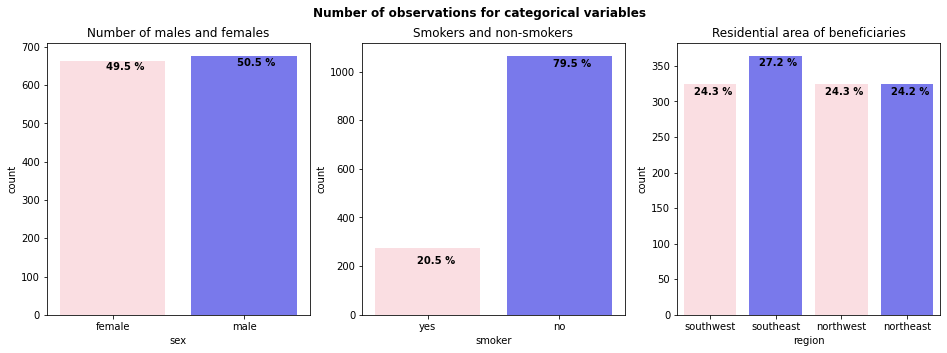

In [6]:
'''
How many are men and how many are women? 
How many are smokers and how many are non-smokers?  
Is there a suburb with more beneficiaries?
'''
# 1. About categorical variables

#3 plots in 1 row
fig, axes = plt.subplots(1, 3, figsize = (16, 5))
fig.suptitle('Number of observations for categorical variables', fontweight = 'bold')

#about gender
sns.countplot(categorical_df['sex'], ax = axes[0], palette = ['pink', 'blue'], alpha = 0.6)
axes[0].set_title('Number of males and females', fontweight = 'light')
axes[0].text(0.95, 650, f"{round(categorical_df['sex'].value_counts()[0]/len(df)* 100, 1)} %", fontweight = 'bold')
axes[0].text(-0.05, 640, f"{round(categorical_df['sex'].value_counts()[1]/len(df)* 100, 1)} %", fontweight = 'bold')


#about smokers
sns.countplot(categorical_df['smoker'], ax = axes[1], palette = ['pink', 'blue'], alpha = 0.6)
axes[1].set_title('Smokers and non-smokers', fontweight = 'light')
axes[1].text(0.95, 1020, f"{round(categorical_df['smoker'].value_counts()[0]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[1].text(-0.08, 210, f"{round(categorical_df['smoker'].value_counts()[1]/len(df) * 100, 1)} %", fontweight = 'bold')


#about region 
sns.countplot(categorical_df['region'], ax = axes[2], palette = ['pink', 'blue'], alpha = 0.6)
axes[2].set_title('Residential area of beneficiaries', fontweight = 'light')
axes[2].text(0.75, 350, f"{round(categorical_df['region'].value_counts()[0]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[2].text(-0.25, 310, f"{round(categorical_df['region'].value_counts()[1]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[2].text(1.75, 310, f"{round(categorical_df['region'].value_counts()[2]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[2].text(2.75, 310, f"{round(categorical_df['region'].value_counts()[3]/len(df) * 100, 1)} %", fontweight = 'bold');

* sex : We note that in our sample about 50 per cent are men and the remaining 50 per cent are women. This is very good as the model we will estimate will represents both sexes.
* smoker : On the contrary, smokers account for about 20 percent of the data set and the remaining 80 non-smokers. This means that the model we were going to estimate is more representative for non-smokers.
* region : About the beneficiaries' residential area, we observe that 25 percent of observations are shared in 4 suburbs of US.

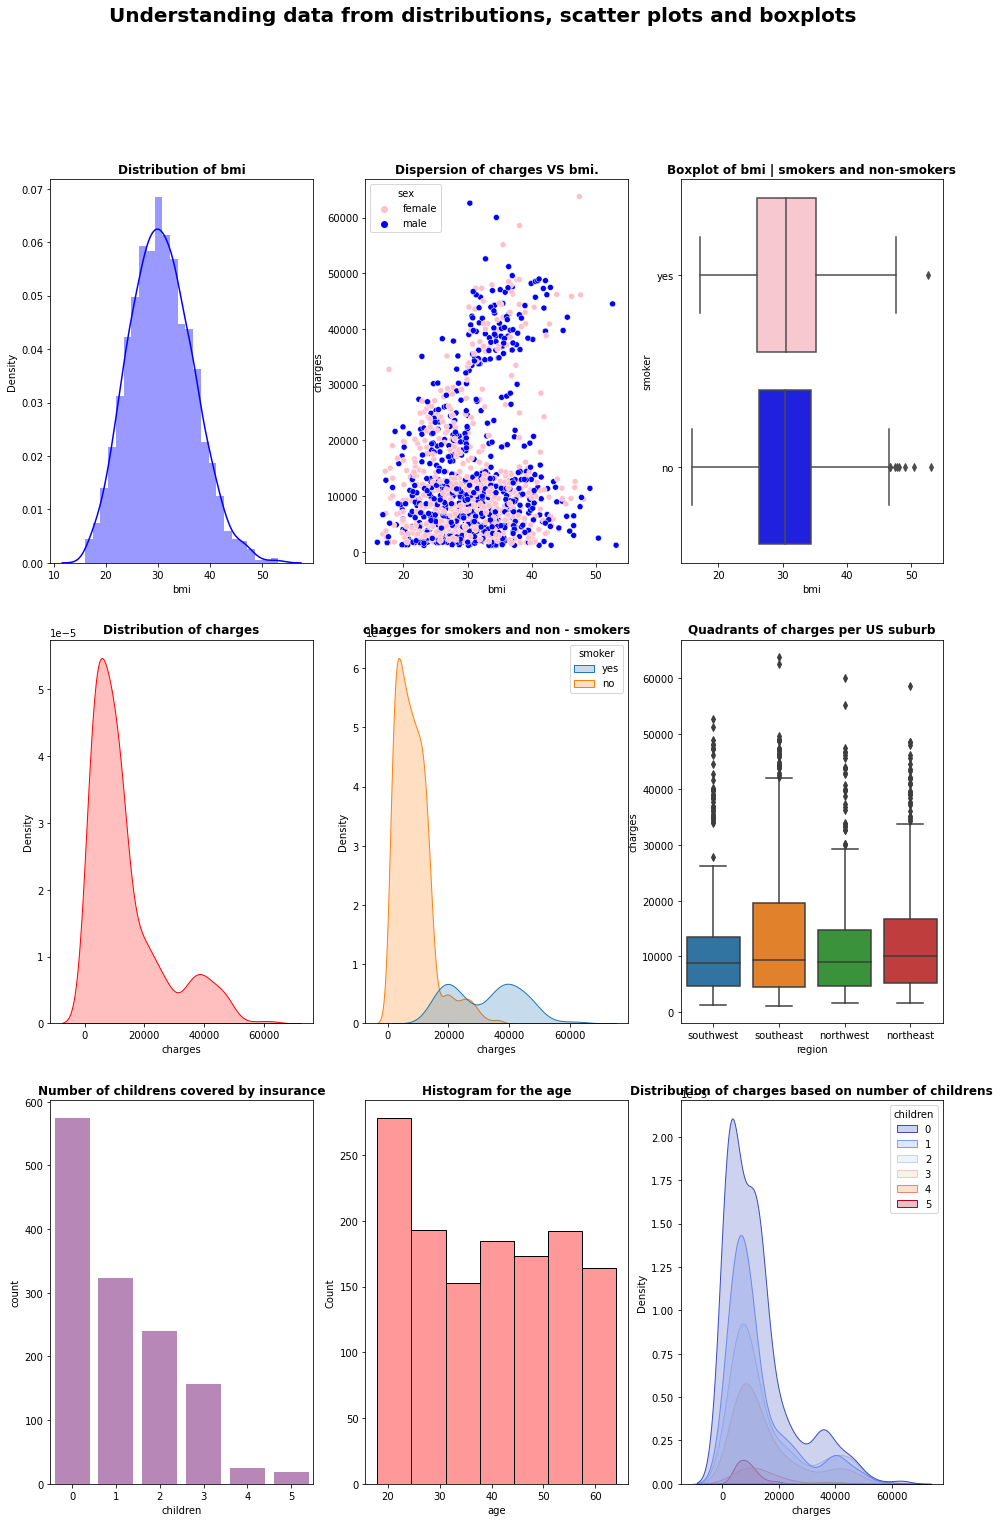

In [7]:
# 2. Distributions, outliers and the relationship between bmi and charges.

fig, axes = plt.subplots(3, 3, figsize = (16, 24))
fig.suptitle('Understanding data from distributions, scatter plots and boxplots', fontweight = 'bold', fontsize = 20)

#About bmi
sns.distplot(df['bmi'], ax = axes[0, 0], color = 'blue')
axes[0, 0].set_title('Distribution of bmi', fontweight = 'bold')

#About bmi per gender
sns.scatterplot(y = df['charges'], x = df['bmi'], hue = df['sex'], palette = ['pink', 'blue'], ax = axes[0, 1])
axes[0, 1].set_title('Dispersion of charges VS bmi.', fontweight = 'bold')

#About bmi and smokers
sns.boxplot(x = df['bmi'], y = df['smoker'], ax = axes[0, 2], palette = ['pink', 'blue'])
axes[0, 2].set_title('Boxplot of bmi | smokers and non-smokers', fontweight = 'bold')

#About target variable('charges')
sns.kdeplot(df['charges'], color = 'red', shade = True,  ax = axes[1, 0]) 
axes[1, 0].set_title('Distribution of charges', fontweight = 'bold')

#Charges and gender
sns.kdeplot(df['charges'], hue = df['smoker'], shade = True, ax = axes[1, 1])
axes[1, 1].set_title('charges for smokers and non - smokers', fontweight = 'bold')

#charges and region
sns.boxplot(x = df['region'], y = df['charges'], ax = axes[1, 2])
axes[1, 2].set_title('Quadrants of charges per US suburb', fontweight = 'bold')

#About number of childrena
sns.countplot(df['children'], color = 'purple', ax = axes[2, 0], alpha = 0.5)
axes[2, 0].set_title('Number of childrens covered by insurance', fontweight = 'bold')

#About the ages 
sns.histplot(df['age'], bins = 7, color = 'red', edgecolor = 'black', alpha = 0.4, ax = axes[2, 1])
axes[2, 1].set_title('Histogram for the age', fontweight = 'bold')


#Charges vs bmi based on number of childrens
sns.kdeplot(df['charges'], hue = df['children'], ax = axes[2, 2], shade = True, palette = 'coolwarm')
axes[2, 2].set_title('Distribution of charges based on number of childrens', fontweight = 'bold')
plt.show()

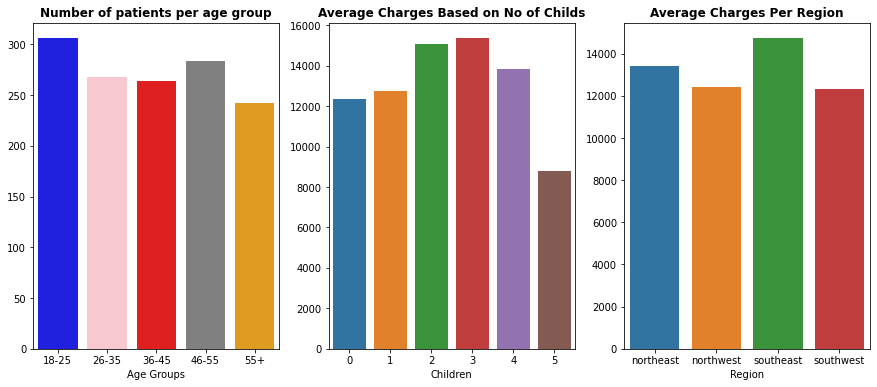

In [8]:
#3. Visualizations, grouping ages and average number of charges based on Number of childs and region of residence
fig, axes = plt.subplots(1, 3, figsize = (15, 6))

#Visualizing Number Of Patients Per Age group
age_18_25 = df.age[(
            df.age >= 18) 
            & (df.age <= 25)]

age_26_35 = df.age[(
            df.age >= 26) 
            & (df.age <= 35)]

age_36_45 = df.age[(
            df.age >= 36) 
            & (df.age <= 45)]

age_46_55 = df.age[(
            df.age >= 46) 
            & (df.age <= 55)]

age_55_above = df.age[df.age >= 55]

x_age_groups = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55_above)]

sns.barplot(x = x_age_groups, y = y_age, data = df, 
            palette = ['blue', 'pink', 'red', 'grey', 'orange'], ax = axes[0])
axes[0].set_title('Number of patients per age group', fontweight = 'bold')
axes[0].set_xlabel('Counr')
axes[0].set_xlabel('Age Groups')


#Average Charges Based On Number Of Childrens
df_child = df.groupby(['children'])['charges'].mean().reset_index(drop = True)
sns.barplot(x = df_child.index, y = df_child.values, ax = axes[1])
axes[1].set_title('Average Charges Based on No of Childs', fontweight = 'bold')
axes[1].set_xlabel('Charges')
axes[1].set_xlabel('Children')

#Average Charges Per Region
df_region = df.groupby(['region'])['charges'].mean()
sns.barplot(x = df_region.index, y = df_region.values, ax = axes[2])
axes[2].set_title('Average Charges Per Region', fontweight = 'bold')
axes[2].set_xlabel('Charges')
axes[2].set_xlabel('Region');

* BMI : At first glance, looking at the distribution of BMI is evident that approaches normal distribution. Also, we know from literature that the ideal bmi for a person is between 18.5 and 24.9. However, we see much variability in the bmi from 15 to near 57. Some of these points could be considered as outliers points , especially when bmi is above 48(this will be excluded from the statistical analysis, below). Additionally, from the scatter plot (charges~bmi), we can conclude that when charges are between 0-100 the variability of bmi varies. Furthermore,  there is a more linear relationship when charges are 2000 and more. Especially, we can see that from the point 2000 as bmi increases , also increases the charges.An important conclusion in this range of charges is that most of points are represented by males. In conclusion, in chart(0, 2), initially, we know that the 80 percent of obs are non-smokers.We can see from the boxplot that about smokers  the minimum value of bmi is bigger than non-smokers, while the same can be concluded about the max value(is bigger). Also, even though , the 20 percent of obs are represented from smokers , we can see that there is one person who has extremely big bmi. Also, about non-smokers there are more points that can be characterized as outliers points but does make sense due to the fact that the 80% of our obs are non-smokers.
* CHARGES : From the figure(1, 0) is evident that our target vaiable does not approach normal distribution. The variability about that medical costs is too much. Medical costs vary from about 1200 to near 65000. The kdeplot based on smoker feature can explain the distribution. Initially, non-smokers  can pay up to 40000.But on smokers we can observe that there are 2 peaks. Τhe first is between 2000 and 35000 and the second between 35000 and more than 60000 medical costs. This is a very important information that for more than 40000 medical costs are paid from smokers and of course does make sense.
* NUMBER OF CHILDRENS : Furthermore, we can see that most values are collected on the left, i.e. in people who do not have children and as the number of children increases, the insurance covers a smaller number of beneficiaries. 
* AGE : From the histogram we can see that there are two groups of ages. The first is between 20 and 40 nad the second between 40 and 60.Also, most beneficiaries are between about 18 and 25 , while between 32 and 38 the number of beneficiaries is smallest.
* NUMBER OF PATIENTS PER AGEE GROUP :  Also, we can that the group 18-25 have the highest patients, while patients are less in the age group 55+.
* AVERAGE CHARGES PER NUMBER OF CHILDS : Surprinsigly, those with 3 children pay on average the most charges, while those with 5 children pay the least. It is intersting that patients with 0 children although they represent the largest number of the data set, the average charges are lower.
* AVERAGE CHARGES PER REGION : As we can the highest charges are represented by patients who located in Southeast suburb. But, the difference in average charges per region are negligible and do not differ dramatically.

# 4. Descriptive analysis

In [9]:
#numerical features
num_descr_stats = round(numerical_df.describe().T, 2)
num_descr_stats['+3std'] = num_descr_stats['mean'] + (num_descr_stats['std'] * 3)
num_descr_stats['-3std'] = num_descr_stats['mean'] - (num_descr_stats['std'] * 3)
num_descr_stats

,count,mean,std,min,25%,50%,75%,max,+3std,-3std
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00,81.36,-2.94
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13,48.96,12.36
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00,4.72,-2.54
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43,49600.45,-23059.61


In [10]:
#categorical features
categ_num_stats = categorical_df.describe()
categ_num_stats

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* Descriptive statistics insights:
-------------------------------------------------------------------------------------------------------------
   ---> About the age variable we can conclude that 50 percent of beneficiaries are under 39 years old and the remaining 50 percent over 39 years old. Is evident that the range of ages under 39 years old is less wide(18-39 years old) in comparison with the remaining over 39 years old(39 - 64 years old).  Also, the variation is remarkable but adding in the data frame the +- 3 standard deviations we can see that data does not fall out of +- 3 standard deviations.

In [11]:
'''
In this step i will try to take some insights for 
benefeciaries  where the charges from the insurance 
are greater than 3 standard deviations from the average number of charges.  
'''

#3+ stand deviations from the mean of charges
stdev3 = round(df['charges'].mean() + (df['charges'].std() * 3), 2)
charges_df_outliers = df[df['charges'] > stdev3].reset_index(drop = True)# a data frame with charges > 3stdeviations
charges_df_outliers = charges_df_outliers.sort_values(by = 'age')
charges_df_outliers

,age,sex,bmi,children,smoker,region,charges
0,28,male,36.400,1,yes,southwest,51194.55914
2,31,female,38.095,1,yes,northeast,58571.07448
3,33,female,35.530,0,yes,northwest,55135.40209
6,45,male,30.360,0,yes,southeast,62592.87309
5,52,male,34.485,3,yes,northwest,60021.39897
1,54,female,47.410,0,yes,southeast,63770.42801
4,60,male,32.800,0,yes,southwest,52590.82939


In [12]:
'''
How many of beneficiaries are more than +3 standard deviations from the mean 
number of bmi and how many of these people are between 18.5 and 24.9 where according to literarure 
the ideal bmi is in this range.  
'''
#more than 3std bmi
more_than_3std_bmi = round(df['bmi'].mean() + (df['bmi'].std() * 3), 2)
#bmi_df_outliers
bmi_df_outliers = df[df['bmi'] > more_than_3std_bmi].reset_index(drop = True).sort_values(by = 'bmi')
bmi_df_outliers

,age,sex,bmi,children,smoker,region,charges
0,58,male,49.06,0,no,southeast,11381.3254
1,23,male,50.38,1,no,southeast,2438.0552
2,22,male,52.58,1,yes,southeast,44501.3982
3,18,male,53.13,0,no,southeast,1163.4627


In [13]:
'''
Some informations for the beneficiaries whose body mass index(BMI) is at ideal levels,
ie 18.5 to 24.9. 
'''

#setting the lower and upper limit of bmi
lower_limit = 18.5
upper_limit = 24.9

#condition in order the dataframe based on the lower and upper limit
ideal_body_mass = (df[
    (df['bmi'] >= lower_limit)
    & (df['bmi'] <= upper_limit)
])
print(f"The number of beneficiaries whose bmi is between the ideal bmi range is : {ideal_body_mass.shape[0]}, i.e {round(ideal_body_mass.shape[0]/len(df) * 100, 2)}% of the overall population.")

The number of beneficiaries whose bmi is between the ideal bmi range is : 222, i.e 16.59% of the overall population.


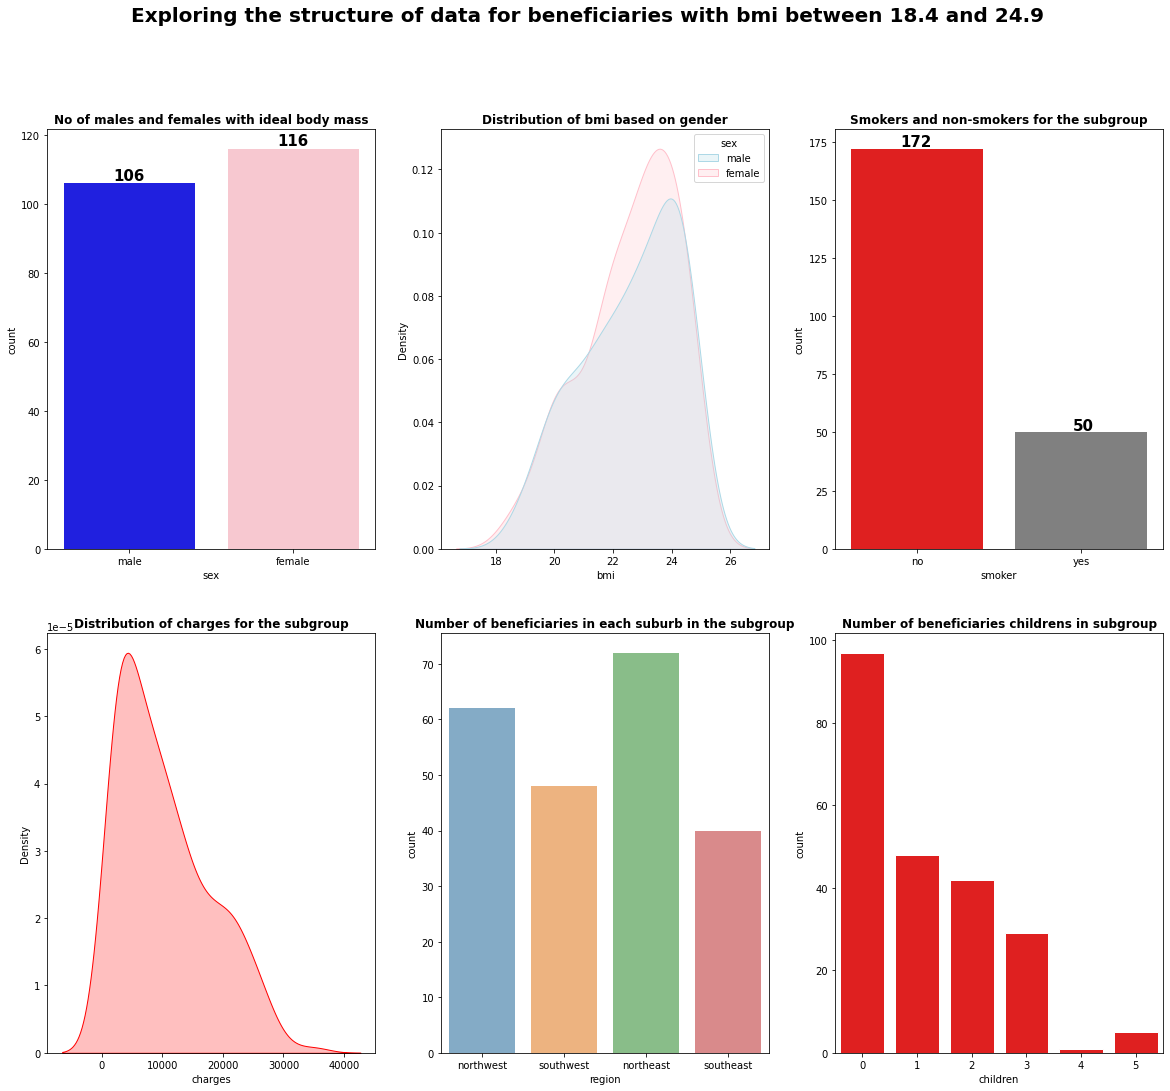

In [14]:
# 4. Visualizing some informations for the subgroup of beneficiaries with bmi between 18.5 and 24.9
fig, axes = plt.subplots(2, 3, figsize = (20, 17))
fig.suptitle('Exploring the structure of data for beneficiaries with bmi between 18.4 and 24.9', fontweight = 'bold', fontsize = 20)

#Let's see the how many of females and males are in this range
sns.countplot(ideal_body_mass['sex'], palette = ['blue', 'pink'], ax = axes[0, 0])
axes[0, 0].set_title('No of males and females with ideal body mass', fontweight = 'bold')
axes[0, 0].text(0.90, 117,ideal_body_mass['sex'].value_counts()[0], fontweight = 'bold', fontsize = 15)
axes[0, 0].text(-0.1, 107,ideal_body_mass['sex'].value_counts()[1], fontweight = 'bold', fontsize = 15)

#distributions of bmi based on the sex
sns.kdeplot(ideal_body_mass['bmi'], hue = ideal_body_mass['sex'], ax = axes[0, 1], shade = True, palette = ['lightblue', 'pink'])
axes[0, 1].set_title('Distribution of bmi based on gender', fontweight = 'bold')

#how many of these beneficiaries are smokers and non-smokers
#Let's see the how many of females and males are in this range
sns.countplot(ideal_body_mass['smoker'], palette = ['red', 'grey'], ax = axes[0, 2])
axes[0, 2].set_title('Smokers and non-smokers for the subgroup', fontweight = 'bold')
axes[0, 2].text(0.95, 51,ideal_body_mass['smoker'].value_counts()[1], fontweight = 'bold', fontsize = 15)
axes[0, 2].text(-0.1, 173,ideal_body_mass['smoker'].value_counts()[0], fontweight = 'bold', fontsize = 15)

#distributions of charges for this subgroup
sns.kdeplot(ideal_body_mass['charges'], ax = axes[1, 0], shade = True, color = 'red')
axes[1, 0].set_title('Distribution of charges for the subgroup', fontweight = 'bold')

#about the region of beneficiaries in this range
sns.countplot(ideal_body_mass['region'], ax = axes[1, 1], alpha = 0.6)
axes[1, 1].set_title('Number of beneficiaries in each suburb in the subgroup', fontweight = 'bold')

#beneficiaries' children
sns.countplot(ideal_body_mass['children'], color = 'red', ax = axes[1, 2], edgecolor = 'white')
axes[1, 2].set_title('Number of beneficiaries childrens in subgroup', fontweight = 'bold')
plt.show()

* About charges data frame with outliers.
###### Firstly, that all of beneficiaries are smokers. Even though , just the 20 percent of obs are smokers , we can see that the outliers are represented from smokers.
###### Additionally, we can see that 3 of benefciaries are females and the range of their ages is between 31-54, while in the remaining 4 of males the age range is wider from 28 to 60.
###### So, I do not remove outliers based on the assumption that the data follow the normal distribution. I will try to implement a more advanced approach from statsmodels package, i.e VIF.

* About bmi data frame with outliers.
###### We can see that as the bmi increases from 49.06 to 53.13 , the age of beneficiaries decreases, indicating a negative strong linear relationship. Also, we can see that all of these beneficiaries came from southeast suburb and  only 1 of these people is smoker. The number of outliers is extremely small and i think does not impact in the present situation the analysis.

* About the subgroup with bmi between 18.5 to 24.9(according to the literature https://en.wikipedia.org/wiki/Body_mass_index)    
###### We can see that most of the beneficiaries with the ideal BMI are females as opposed to the overall population where beneficiaries are 50 percent males and 50 percent females. One additional interesting thing is that most of these people are located in northeast suburb, while in the overall population most of them are located in southeast suburb. Also, as in overall population most of them are non-smokers , while the charges for these beneficiaries vary between 1123 and 35000, i.e from the minimum value in the data set to the total population, while the maximum value in the subset is about 30,000 less compared to the total population where maximum charges is approximately 65.000

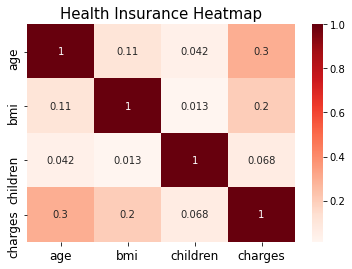

In [15]:
#5. Correlation analysis

#Exploring linear relationships
df_corr = df.corr()
sns.heatmap(
    df_corr, annot = True, cmap = 'Reds',
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values,
    )
plt.title('Health Insurance Heatmap', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

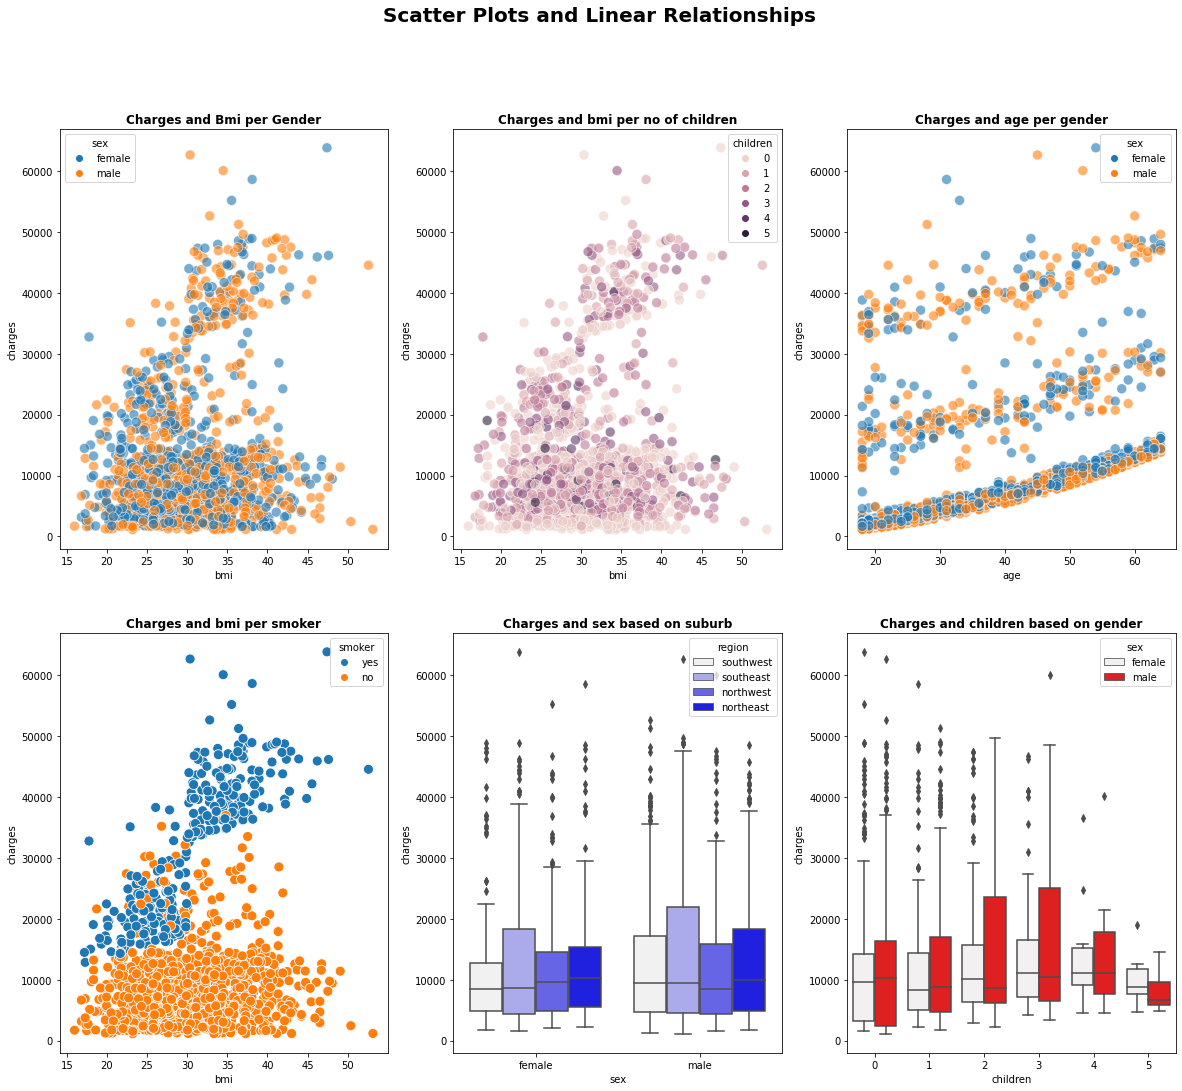

In [16]:
#6. Scatter plots for each predictor against target variable[Charges]

fig, axes = plt.subplots(2, 3, figsize = (20, 17))
fig.suptitle('Scatter Plots and Linear Relationships', fontweight = 'bold', fontsize = 20)

#Charges Vs Bmi based on gender
sns.scatterplot(x = df['bmi'], y = df['charges'], hue = df['sex'], 
                ax = axes[0, 0], s = 100, color = 'red', edgecolor = 'white', alpha = 0.6)
axes[0, 0].set_title('Charges and Bmi per Gender', fontweight = 'bold')

#Charges Vs bmi based on no of children
sns.scatterplot(x = df['bmi'], y = df['charges'], hue = df['children'], 
                ax = axes[0, 1], s = 100, color = 'black', edgecolor = 'white', alpha = 0.6)
axes[0, 1].set_title('Charges and bmi per no of children', fontweight = 'bold')

#Charges Vs bmi based on no of children
sns.scatterplot(x = df['age'], y = df['charges'], hue = df['sex'], 
                ax = axes[0, 2], s = 100, color = 'black', edgecolor = 'white', alpha = 0.6)
axes[0, 2].set_title('Charges and age per gender', fontweight = 'bold')

#Charges and bmi per smoker status
sns.scatterplot(x = df['bmi'], y = df['charges'], hue = df['smoker'],
                ax = axes[1, 0], color = 'red', s = 100, edgecolor = 'white')
axes[1, 0].set_title('Charges and bmi per smoker', fontweight = 'bold')

#Charges Vs sex based on suburb
sns.boxplot(x = df['sex'], y = df['charges'], hue = df['region'],
                ax = axes[1, 1], color = 'blue')
axes[1, 1].set_title('Charges and sex based on suburb', fontweight = 'bold');


#Charges Vs sex based on suburb
sns.boxplot(x = df['children'], y = df['charges'], hue = df['sex'],
                ax = axes[1, 2], color = 'red')
axes[1, 2].set_title('Charges and children based on gender', fontweight = 'bold');

* CORRELATIONS
###### As we can(again) see from the correlation plot, and plotting above each variable against Charges, there is not a visible linear correlation between Charges and each predictor.
###### Bmi have slightly correlation  with charges, as bmi increases , charges may also increase
###### Beneficiaries/patients who smoke have high bmi and charges. The linear relationship is strongest for  between charges and bmi for patients who smoke, while for non smokers there is a remarkable variation in bmi when charges are between minimum value of charges and 10.000.
##### Charges for male beneficiaries are higher than female beneficiaries
##### Charges of beneficiaries from southeast are higher , while the interquartile range about charges for males is wider.
##### The conclusion is that there is no strong positive or negative correlation between the independent variables and the dependent, however there are some sub-associated relationships as found above.

# 5. Data Preparation | Feature Engineering 

In [17]:
'''
In this step I will convert string into numbers. Especially, using OneHotEncoder and get_dummies 
from sklearn and pandas, respectively.Then, i will create for categorical[nominal] variables as 
many columns as the unique values they receive and i will I will delete one of them in order to 
eliminate the resulting multicolinearity.
'''
#display categorical variables
print(f'The categorical variable of our data set are {categorical}')
categorical_df.head()

The categorical variable of our data set are ['sex', 'smoker', 'region']


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [18]:
#A copy of df as encoding df
df_enc = df.copy()
df_enc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
#Encoding categorical feature 'sex'. Drop first is acceptable due to the the fact that males are 676 instead of females' number which is 662
df_enc = pd.get_dummies(df_enc, prefix = ['sex'], columns = ['sex'], drop_first = True)
#Encoding categorical feature 'smoker'. I will drop smoker_yes due to the fact that smoker_no represents 1064 patients
df_enc = pd.get_dummies(df_enc, prefix = ['smoker'], columns = ['smoker'])
df_enc.drop('smoker_yes', axis = 1, inplace = True)
#Encoding categorical feature 'region'. The colum that dropped is 'northwest'
df_enc = pd.get_dummies(df_enc, prefix = ['region'], columns = ['region'])
df_enc.drop("region_northwest", axis = 1, inplace = True)

In [20]:
df_enc.head()

,age,bmi,children,charges,sex_male,smoker_no,region_northeast,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,0,0,1
1,18,33.770,1,1725.55230,1,1,0,1,0
2,28,33.000,3,4449.46200,1,1,0,1,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


##### So, as we can see we have convert string into numbers, creating as many columns (for categorical vars) as the unique values of each variable. Additionally, i dropped one column of these columns which have been created for the unique values of each feature in order to eliminate perfect multicolinearity. Now, the interpretation of categorical variable will be interpreted given the removed feature.

In [21]:
'''
In this section i will try to identify if feature scaling is important in this step in order to prepare
the model for training. I will implement different Scalers based on the description of sklearn such as
MinMaxScaler, StandardScaler, MinAbsScaler and RobustScaler(is less sensitive to outliers)
Scaling features is vital in this dataset due to the fact that because the scales of variable 
numbers vary widely and at the same time the units of measurement are different such as the bmi variable.
'''
#Firstly, we should split the dataset into X_features and y_predictor

#pretrain_model without scaling features using pinguin library
X_features = df_enc.drop('charges', axis = 1)
y_target_variable = df_enc['charges']

pretrain_model = pg.linear_regression(X_features, y_target_variable, add_intercept = True)
pretrain_model

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,11557.032066,1038.931015,11.123965,1.511725e-27,0.750913,0.749414,9518.908537,13595.155595
1,age,256.856353,11.898849,21.586655,7.783217e-89,0.750913,0.749414,233.513778,280.198927
2,bmi,339.193454,28.599470,11.860131,6.498194e-31,0.750913,0.749414,283.088426,395.298482
3,children,475.500545,137.804093,3.450555,5.769682e-04,0.750913,0.749414,205.163286,745.837805
4,sex_male,-131.314359,332.945439,-0.394402,6.933475e-01,0.750913,0.749414,-784.470270,521.841552
5,smoker_no,-23848.534542,413.153355,-57.723202,0.000000e+00,0.750913,0.749414,-24659.038379,-23038.030705
6,region_northeast,352.963899,476.275786,0.741091,4.587689e-01,0.750913,0.749414,-581.370404,1287.298203
7,region_southeast,-682.058150,478.959158,-1.424042,1.546689e-01,0.750913,0.749414,-1621.656561,257.540261
8,region_southwest,-607.087092,477.203912,-1.272175,2.035333e-01,0.750913,0.749414,-1543.242147,329.067963


* |INTERPRETATION OF THE MODEL|
 ###### R^2 = As we can see the r square is 75.09, i.e that the estimated model that 74.94 percent of variability of charges  is explained by estimated model, while if we add one additional predictor(adj_rsquare) the explained variability will be reduced.
 * Coefficients
###### intercept = The average expected overhead amount of charges when all variables are fixed is 11557.
###### age = If the age increases by one year, since the remaining variables remain constant, then the charges increase on average approx 256.85
###### bmi = If the Body mass index increases by one unit, since the remaining variables remain constant, then the charges increase on average approx 339.19
###### chldren = If the protected members are increased by one then the charges will increase on average approximately 475,50.
###### sex_male = If the patient is male, since the remaining variables remain constant, then the charges decrease on average approx -131.31, in relation to whether was female.
###### smoker_no = If the patient is non-smoker, since the remaining variables remain constant, then the charges decrease on average approx -23848, in relation to whether was smoker.
###### region_northeast = If the patient is located in NORTHEAST suburb, since the remaining variables remain constant, then the charges increase on average approx 352, in relation to whether he lived in the northwest suburbs.
###### region_southeast = If the patient is located in SOUTHEASTsuburb, since the remaining variables remain constant, then the charges decrease on average approx -682, in relation to whether he lived in the northwest suburbs.
###### region_southwest =  If the patient is located in SOUTHWEST suburb, since the remaining variables remain constant, then the charges decrease on average approx -607, in relation to whether he lived in the northwest suburbs.

* Statistical significance of coefficients
###### We have confidence intervals.
###### Hypothesis zero : The estimated coefficient of regression i of the population i is equal to βi , i.e. each estimated coefficient equals zero, since all independent variables are included in the estimated model.
###### Hypothesis Alternative : The estimated coeff is different from zero, since all independent variables are included in the estimated model.
###### So, looking at the confidence intervals we can see(again) that confidence intervals with α = 5 per cent, containing zero are the estimated coefficients of variables ["sex_male"] and ["region_northeast"], so these variables are non-statistically significants. That means that underlies the problem of multicollinearity, something that i did not explore in previous analysis.

In [22]:
'''
In this step i will create a pretrain model , assuming that Region is ordinal categorical variable in order to
examine if the results are identical
'''
df_enc2 = df.copy()
df_enc2 = pd.get_dummies(df_enc2, prefix = ['sex'], columns = ['sex'], drop_first = True)
#Encoding categorical feature 'smoker'. I will drop smoker_yes due to the fact that smoker_no represents 1064 patients
df_enc2 = pd.get_dummies(df_enc2, prefix = ['smoker'], columns = ['smoker'])
df_enc2.drop('smoker_yes', axis = 1, inplace = True)
#assuming that region is ordinal variable
df_enc2['region'] = df_enc2['region'].replace({'southwest' : 0, 'southeast' : 1,
                                              'northwest' : 2, 'northeast' : 3})

In [23]:
'''
Pretrain model2
'''
#pretrain_model2 without scaling features using pinguin library
X2_features = df_enc2.drop('charges', axis = 1)
y_target_variable2 = df_enc2['charges']

pretrain_mode2 = pg.linear_regression(X2_features, y_target_variable2, add_intercept = True)
pretrain_mode2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10944.061752,1064.101665,10.284790,6.311814e-24,0.750737,0.749614,8856.562545,13031.560959
1,age,257.288075,11.885743,21.646781,2.848607e-89,0.750737,0.749614,233.971243,280.604907
2,bmi,332.570132,27.722166,11.996542,1.471633e-31,0.750737,0.749614,278.186232,386.954032
3,children,479.369394,137.644218,3.482670,5.125266e-04,0.750737,0.749614,209.346137,749.392650
4,region,353.640017,151.926590,2.327703,2.007715e-02,0.750737,0.749614,55.598348,651.681685
5,sex_male,-131.110580,332.810704,-0.393949,6.936815e-01,0.750737,0.749614,-784.001280,521.780121
6,smoker_no,-23820.434123,411.842878,-57.838645,0.000000e+00,0.750737,0.749614,-24628.366024,-23012.502221


##### In pretrain model2 , we can see a difference. Assuming that region variable is ordinal categorical is the single one variable which is no_statistically significant is "sex_male". Region, is statistically significant for alpha = 0.05. 

In [24]:
'''
Pretrain_model3 without using sex_male variable
'''

#pretrain_model3 without scaling features using pinguin library
df_enc3 = df_enc2.copy()
df_enc3.drop('sex_male', axis = 1, inplace = True) # non-statistically significant

#features and target
X3_features = df_enc3.drop('charges', axis = 1)
y_target_variable3 = df_enc3['charges']

pretrain_model3 = pg.linear_regression(X3_features, y_target_variable3, add_intercept = True)
pretrain_model3

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10881.012089,1051.663452,10.346477,3.477347e-24,0.750708,0.749772,8817.914928,12944.109250
1,age,257.405034,11.878266,21.670253,1.914301e-89,0.750708,0.749772,234.102886,280.707182
2,bmi,332.041967,27.680945,11.995326,1.487425e-31,0.750708,0.749772,277.738968,386.344966
3,children,478.440467,137.580369,3.477534,5.223427e-04,0.750708,0.749772,208.542650,748.338283
4,region,353.449131,151.877631,2.327197,2.010405e-02,0.750708,0.749772,55.503710,651.394551
5,smoker_no,-23808.212820,410.542560,-57.992070,0.000000e+00,0.750708,0.749772,-24613.593276,-23002.832364


###### Above you can see the variables I will eventually use to train the model on data that it has not seen. An overall statistically significant model with statistically significant cestimators. But one additional thing is that i should explore and the assumptions about linear models.

###### In this step i will build the model using the estimators that have been observed above, splitting into train and test set, using different scalers such as StandardScaler and  RobustScaler(according to sklearn is less sensitive to outliers and in our dataset, outliers have been observed in bmi feature, especially.)

In [25]:
'''
 ______________
|StandardScaler|
'''
scaler1 = StandardScaler()
#splitting features based on statistically significant features
features = df_enc3.drop("charges", axis = 1)
target = df_enc3['charges']

features = scaler1.fit_transform(features)
features = pd.DataFrame(features, columns = ['age', 'bmi', 'children', 'region', 'smoker_no'])
features.head()

,age,bmi,children,region,smoker_no
0,-1.438764,-0.453320,-0.908614,-1.343905,-1.970587
1,-1.509965,0.509621,-0.078767,-0.438495,0.507463
2,-0.797954,0.383307,1.580926,-0.438495,0.507463
3,-0.441948,-1.305531,-0.908614,0.466915,0.507463
4,-0.513149,-0.292556,-0.908614,0.466915,0.507463


In [26]:
'''
 ____________
|RobustScaler|
'''
scaler2 = RobustScaler()
#splitting features based on statistically significant features
features_robust = df_enc3.drop("charges", axis = 1)
target_robust = df_enc3['charges']

features_robust = scaler2.fit_transform(features)
features_robust = pd.DataFrame(features_robust, columns = ['age', 'bmi', 'children', 'region', 'smoker_no'])
features_robust.head()

,age,bmi,children,region,smoker_no
0,-0.833333,-0.297708,-0.5,-1.0,-2.47805
1,-0.875000,0.401310,0.0,0.0,0.00000
2,-0.458333,0.309616,1.0,0.0,0.00000
3,-0.250000,-0.916344,-0.5,1.0,0.00000
4,-0.291667,-0.181006,-0.5,1.0,0.00000


###### The above pre-processing of the data had the following objectives:
 ###### a) To distinguish which variables are statistically significant and which are not.
 ###### b) To format the variables in the appropriate climate, bearing in mind that there are ectopic points.

# 6. Algorithm Application and Evaluation
  #### a. First Model

In [27]:
'''
Firstly, i will implement the linear regression algorithm, 
drawing on the conclusions of the above procedure. 
That is, in the in the total dataset that statistically significant variables 
are age, bmi, children, region, smoker_no. 
Hint : In this case, the "region" variable has been treated as an ordinal.
'''

features #features with StandardScaler
target # Charges dependent 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

print(f"Features train size is {features_train.shape}. Number of obs = {len(features_train)}")
print(f"Features test size is {features_test.shape}. Number of obs = {len(features_test)}")
print(f"Target train size is {target_train.shape}. Number of obs = {len(target_train)}")
print(f"Target test size is {target_test.shape}. Number of obs = {len(target_test)}")

Features train size is (936, 5). Number of obs = 936
Features test size is (402, 5). Number of obs = 402
Target train size is (936,). Number of obs = 936
Target test size is (402,). Number of obs = 402


In [28]:
results_model1 = [] #saving results of model1

multiple_linear_model1 = LinearRegression()
multiple_linear_model1.fit(features_train, target_train)
prediction_model1 = multiple_linear_model1.predict(features_test)
score_model1 = r2_score(target_test, prediction_model1)
results_model1.append(score_model1)

In [29]:
print(f"R^2 in train set is : {r2_score(target_train, multiple_linear_model1.predict(features_train))}")
print(f"R^2 in test set is : {score_model1}")
print("-"* 50)
print(f"Mean Absolute Error in train set is : {mean_absolute_error(target_train, multiple_linear_model1.predict(features_train))}")
print(f"Mean Absolute Error in test set is : {mean_absolute_error(target_test, prediction_model1)}")
print("-" * 50)
print(f"Mean Squarred Error in train set is : {mean_squared_error(target_train, multiple_linear_model1.predict(features_train))}")
print(f"Mean Squarred Error in test set is : {mean_squared_error(target_test, prediction_model1)}")
print("-"*50)
print(f"Root Mean Squarred Error in train set is : {np.sqrt(mean_squared_error(target_train, multiple_linear_model1.predict(features_train)))}")
print(f"Root Mean Squarred Error in test set is : {np.sqrt(mean_squared_error(target_test, prediction_model1))}")

R^2 in train set is : 0.7422367098256165
R^2 in test set is : 0.7697211527941855
--------------------------------------------------
Mean Absolute Error in train set is : 4251.888904398832
Mean Absolute Error in test set is : 4151.409812177043
--------------------------------------------------
Mean Squarred Error in train set is : 37754174.96328193
Mean Squarred Error in test set is : 33764476.59420977
--------------------------------------------------
Root Mean Squarred Error in train set is : 6144.442608022467
Root Mean Squarred Error in test set is : 5810.72083258263


In [30]:
#Cross Validation for multiple Linear model 1
#5-foldCV  using statistically significant variable 
cross_validation_r2 = cross_val_score(LinearRegression(), features_train, target_train,
                                     scoring = "r2", cv = 5) #r^2 metric
cross_validation_mse = cross_val_score(LinearRegression(), features_train, target_train,
                                     scoring = "neg_mean_squared_error", cv = 5)
mean_CV_r2 = np.mean(cross_validation_r2)
mean_CV_MSE = np.mean(cross_validation_mse)

print(f"5-Folf Cross Validation using as metric R^2 is : {mean_CV_r2 }")
print(f"5-Folf Cross Validation using as metric RMSE is : {np.sqrt(-mean_CV_MSE)}")

5-Folf Cross Validation using as metric R^2 is : 0.7296257108160553
5-Folf Cross Validation using as metric RMSE is : 6188.270192837422


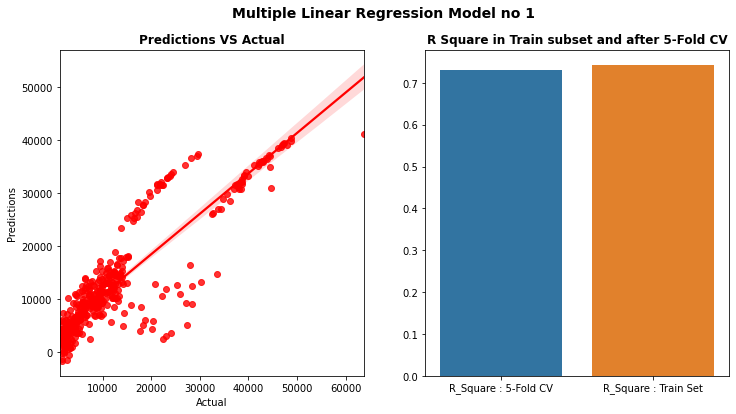

In [31]:
#Model1. Visualizations for multiple linear model1

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Multiple Linear Regression Model no 1', fontweight = 'bold', fontsize = 14)

#Actual VS predicte values
df_mult_linear_regression_model1 = pd.DataFrame({"Actual" : target_test, "Predictions" : prediction_model1})
sns.regplot(x = df_mult_linear_regression_model1['Actual'],
            y = df_mult_linear_regression_model1['Predictions'], color = "red", ax = axes[0]);
axes[0].set_title("Predictions VS Actual", fontweight = "bold")

#Cross Validations R^2 and Train R^2
x = ['R_Square : 5-Fold CV', "R_Square : Train Set"]
y = [mean_CV_r2, r2_score(target_train, multiple_linear_model1.predict(features_train))]

sns.barplot(x = x, y = y, ax = axes[1])
axes[1].set_title("R Square in Train subset and after 5-Fold CV", fontweight = "bold");

* Conclusions about first model with statistically significants coefficients.
_______________________________________________________________________________
 ###### The first that can be concluded is that RMSE in test set is 5810,72. Bearing in mind that charges vary from the test set ranging from 3761 to 13831, a typical prediction error of 5810 is not very satisfying.
 ######  Also, one thing that seems to be problematic in the model is that before 5-fold cross validation , even though test and train R^2 are identical and close, we can see that in test set R^2 is higher and that means that error in test set is lower compared to the error in the train subset. Something like this does not acceptable because  the test error cannot be closer to the truth.
 ###### BUT, implementing 5-fold cross validation we have some important conclusion that the model does not have overfitting. Especially, as you can see from above graph R_SQUARE in train set is  greater than the average R_SQUARE of 5-fold CV(i.e ). Also, one additional important thing is that MSE of 5-fold Cross Validation is higher in comparison to Train Set MSE. 
 ###### Of course, we do not accept that we have build the best model. But, i think that the model is enough acceptable because does not overfitting.
 ###### So, the AGE, Number of Children, Bmi, the region(as ordinal categorical), smoker_no(in comparison to whether patient smokes) are good estimators in order to estimate medical cost charges.

## Predictions for a random sample : Model1

In [32]:
#Coefficients and intercept
print(f"Intercept : \n {multiple_linear_model1.intercept_}")
print(f"Coefficients : \n {multiple_linear_model1.coef_}")
print("-"*63)

Intercept : 
 13321.202035863069
Coefficients : 
 [ 3673.74852434  2100.93443699   512.34019237   362.6554326
 -9534.53928069]
---------------------------------------------------------------


In [33]:
features_prediction = features.copy() # I made a copy with scaled features for model1 
target_prediction = target.copy()
target_prediction = pd.DataFrame(target_prediction.tail(100)).reset_index(drop = True)
features_prediction = features_prediction.tail(100).reset_index(drop = True) # 120 sample random
features_prediction #Scaled sample with StandardScaler for the last 100 values

,age,bmi,children,region,smoker_no
0,-0.157143,-1.305531,1.580926,1.372326,0.507463
1,-1.011557,1.881033,-0.078767,-0.438495,0.507463
2,0.910875,1.826898,0.751079,-0.438495,-1.970587
3,1.765289,1.032923,0.751079,-0.438495,-1.970587
4,-1.225161,-1.539294,1.580926,0.466915,0.507463
...,...,...,...,...,...
95,0.768473,0.050297,1.580926,0.466915,0.507463
96,-1.509965,0.206139,-0.908614,1.372326,0.507463
97,-1.509965,1.014878,-0.908614,-0.438495,0.507463
98,-1.296362,-0.797813,-0.908614,-1.343905,0.507463


In [34]:
#Predictions by random selection of features
predicted_values_randomly_selected = pd.DataFrame(multiple_linear_model1.predict(features_prediction))
features_prediction['observed_charges'] = target_prediction
features_prediction['predicted'] = predicted_values_randomly_selected

In [35]:
features_prediction.head()

,age,bmi,children,region,smoker_no,observed_charges,predicted
0,-0.157143,-1.305531,1.580926,1.372326,0.507463,6985.50695,6470.289845
1,-1.011557,1.881033,-0.078767,-0.438495,0.507463,3238.43570,8519.117585
2,0.910875,1.826898,0.751079,-0.438495,-1.970587,47269.85400,39520.142614
3,1.765289,1.032923,0.751079,-0.438495,-1.970587,49577.66240,40990.955809
4,-1.225161,-1.539294,1.580926,0.466915,0.507463,4296.27120,1727.187417


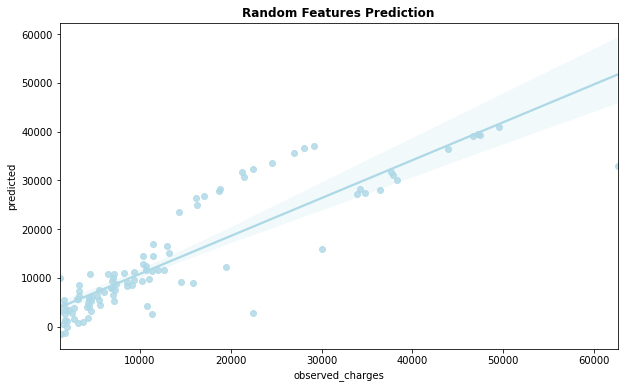

In [36]:
plt.figure(figsize = (10, 6))

sns.regplot(x = features_prediction['observed_charges'], y = features_prediction['predicted'], 
           color = 'lightblue')
plt.title('Random Features Prediction', fontweight = "bold");

### b. Second Model
##### In present trial i will drop region variable. The reason is that in pre-processing procedure, region variable was statistically significant only in a = 0.05. So I'm going to try to improve the results by removing that variable.
##### Also, the reason I don't try to treat the region as a ΝΟΜΙΝΑL categorical is that although I remove a column to eliminate multicolinearity, it's not statistically significant in another suburb (for example, I remove region_southeast and column region_southwest is not statistically important). So I've decided to continue only with statistically significant variables and that's why I don't treat it as an NOMINAL one.
##### Also, in this model will be used RobustScaler

In [37]:
#Multiple linear model2
features_robust #features have been scaled with Robust Scaler
features_robust.drop('region', axis = 1, inplace = True)
target_robust #target has not been normalized

#splitting into train and test set
featuresRobust_train, featuresRobust_test, targetRobust_train, targetRobust_test = train_test_split(
   features_robust, target_robust, test_size = 0.3, random_state = 42)

print(f"Features train size is {featuresRobust_train.shape}. Number of obs = {len(featuresRobust_train)}")
print(f"Features test size is {featuresRobust_test.shape}. Number of obs = {len(featuresRobust_test)}")
print(f"Target train size is {targetRobust_train.shape}. Number of obs = {len(targetRobust_train)}")
print(f"Target test size is {targetRobust_test.shape}. Number of obs = {len(targetRobust_test)}")

Features train size is (936, 4). Number of obs = 936
Features test size is (402, 4). Number of obs = 402
Target train size is (936,). Number of obs = 936
Target test size is (402,). Number of obs = 402


In [38]:
#Training Multiple_Linear_Model2
results_model2 = [] #saving results of model1

multiple_linear_model2 = LinearRegression()
multiple_linear_model2.fit(featuresRobust_train, targetRobust_train)
prediction_model2 = multiple_linear_model2.predict(featuresRobust_test)
score_model2 = r2_score(targetRobust_test, prediction_model2)
results_model2.append(score_model2)

In [39]:
print(f"R^2 in train set is : {r2_score(targetRobust_train, multiple_linear_model2.predict(featuresRobust_train))}")
print(f"R^2 in test set is : {score_model2}")
print("-"* 50)
print(f"Mean Absolute Error in train set is : {mean_absolute_error(targetRobust_train, multiple_linear_model2.predict(featuresRobust_train))}")
print(f"Mean Absolute Error in test set is : {mean_absolute_error(target_test, prediction_model1)}")
print("-" * 50)
print(f"Mean Squarred Error in train set is : {mean_squared_error(targetRobust_train, multiple_linear_model2.predict(featuresRobust_train))}")
print(f"Mean Squarred Error in test set is : {mean_squared_error(targetRobust_test, prediction_model2)}")
print("-"*50)
print(f"Root Mean Squarred Error in train set is : {np.sqrt(mean_squared_error(targetRobust_train, multiple_linear_model2.predict(featuresRobust_train)))}")
print(f"Root Mean Squarred Error in test set is : {np.sqrt(mean_squared_error(targetRobust_test, prediction_model2))}")

R^2 in train set is : 0.7413562501635109
R^2 in test set is : 0.7684636242828375
--------------------------------------------------
Mean Absolute Error in train set is : 4254.463500407084
Mean Absolute Error in test set is : 4151.409812177043
--------------------------------------------------
Mean Squarred Error in train set is : 37883134.47535504
Mean Squarred Error in test set is : 33948860.84184329
--------------------------------------------------
Root Mean Squarred Error in train set is : 6154.927658011508
Root Mean Squarred Error in test set is : 5826.565098052479


In [40]:
#Cross Validation for multiple Linear model 2
#5-foldCV 
cross_validation_r2_model2 = cross_val_score(LinearRegression(), featuresRobust_train, targetRobust_train,
                                     scoring = "r2", cv = 5) #r^2 metric
cross_validation_mse_model2 = cross_val_score(LinearRegression(), featuresRobust_train, targetRobust_train,
                                     scoring = "neg_mean_squared_error", cv = 5)
mean_CV_r2_model2 = np.mean(cross_validation_r2_model2)
mean_CV_MSE_model2 = np.mean(cross_validation_mse_model2)

print(f"5-Folf Cross Validation using as metric R^2 is : {mean_CV_r2_model2}")
print(f"5-Folf Cross Validation using as metric RMSE is : {np.sqrt(-mean_CV_MSE_model2)}")

5-Folf Cross Validation using as metric R^2 is : 0.7288530543371786
5-Folf Cross Validation using as metric RMSE is : 6196.124327227082


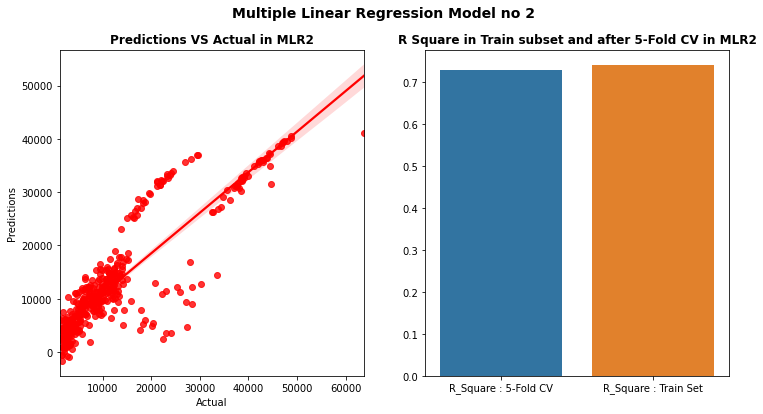

In [41]:
#Model2. Visualizations for multiple linear model2

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Multiple Linear Regression Model no 2', fontweight = 'bold', fontsize = 14)

#Actual VS predicte values
df_mult_linear_regression_model2 = pd.DataFrame({"Actual" : targetRobust_test, "Predictions" : prediction_model2})
sns.regplot(x = df_mult_linear_regression_model2['Actual'],
            y = df_mult_linear_regression_model2['Predictions'], color = "red", ax = axes[0]);
axes[0].set_title("Predictions VS Actual in MLR2", fontweight = "bold")

#Cross Validations R^2 and Train R^2
x_model2 = ['R_Square : 5-Fold CV', "R_Square : Train Set"]
y_model2 = [mean_CV_r2_model2, r2_score(targetRobust_train, multiple_linear_model2.predict(featuresRobust_train))]

sns.barplot(x = x_model2, y = y_model2, ax = axes[1])
axes[1].set_title("R Square in Train subset and after 5-Fold CV in MLR2", fontweight = "bold");

In [42]:
#Coefficients and intercept
print(f"Intercept : \n {multiple_linear_model2.intercept_}")
print(f"Coefficients : \n {multiple_linear_model2.coef_}")
print("-"*63)

Intercept : 
 8310.772057092901
Coefficients : 
 [ 6284.39386994  2799.78826164   866.45215208 -9534.33646471]
---------------------------------------------------------------
